In [1]:
weather = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/weather_madrid_LEMD_1997_2015.csv")

In [2]:
weather.printSchema()

root
-- CET: timestamp (nullable = true)
-- Max TemperatureC: integer (nullable = true)
-- Mean TemperatureC: integer (nullable = true)
-- Min TemperatureC: integer (nullable = true)
-- Dew PointC: integer (nullable = true)
-- MeanDew PointC: integer (nullable = true)
-- Min DewpointC: integer (nullable = true)
-- Max Humidity: integer (nullable = true)
-- Mean Humidity: integer (nullable = true)
-- Min Humidity: integer (nullable = true)
-- Max Sea Level PressurehPa: integer (nullable = true)
-- Mean Sea Level PressurehPa: integer (nullable = true)
-- Min Sea Level PressurehPa: integer (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)
-- Max Wind SpeedKm/h: integer (nullable = true)
-- Mean Wind SpeedKm/h: integer (nullable = true)
-- Max Gust SpeedKm/h: integer (nullable = true)
-- Precipitationmm: double (nullable = true)
-- CloudCover: integer (nullable = true)
-- Events: string (nullable = true)
-- WindDirDegrees: integer (nullable = true)

In [3]:
weather.show()

+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
 CET|Max TemperatureC|Mean TemperatureC|Min TemperatureC|Dew PointC|MeanDew PointC|Min DewpointC|Max Humidity| Mean Humidity| Min Humidity| Max Sea Level PressurehPa| Mean Sea Level PressurehPa| Min Sea Level PressurehPa| Max VisibilityKm| Mean VisibilityKm| Min VisibilitykM| Max Wind SpeedKm/h| Mean Wind SpeedKm/h| Max Gust SpeedKm/h|Precipitationmm| CloudCover| Events|WindDirDegrees|
+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
1997-01-01 00:00:00| 7| 4| 2| 5| 3| 2| 100| 95| 76| 1010| 1008| 1004| 10| 9| 4| 13| 6| null| 0.0| 6| null| 229|
1997-01-02 00:00:00| 7| 3| 0| 6| 3| 0| 100| 92| 71| 1007| 1003| 997| 10| 9| 4| 26| 8| 47| 0.0| 5| Rain| 143|
1997-01-03 00:00:00| 5| 3| 2| 5| 1| -1| 100| 85| 70| 1005| 999| 996| 10| 10| 7| 27| 19| null| 0.0| 6|Rain-Snow| 256|
1997-01-04 00:00:00| 7| 3| -1| -2| -3| -4| 86| 63| 49| 1012| 1010| 1005| 10| 10| 10| 27| 19| 40| 0.0| 2| null| 284|
1997-01-05 00:00:00| 2| 0| -1| 2| 0| -3| 100| 95| 86| 1012| 1008| 1005| 10| 5| 1| 14| 6| null| 0.0| 7| Snow| 2|
1997-01-06 00:00:00| 7| 3| 1| 2| -1| -3| 100| 82| 57| 1014| 1010| 1008| 10| 10| 10| 11| 5| null| 0.0| 4| null| 64|
1997-01-07 00:00:00| 2| 0| -2| 1| -1| -3| 100| 93| 75| 1016| 1014| 1009| 10| 7| 0| 6| 2| null| 0.0| 7| Snow| 43|
1997-01-08 00:00:00| 8| 4| 1| 7| 4| 1| 100| 96| 87| 1015| 1005| 1003| 10| 8| 4| 26| 8| null| 0.0| 7| Rain| 273|
1997-01-09 00:00:00| 12| 10| 8| 8| 3| 0| 100| 65| 44| 1015| 1008| 1003| 10| 10| 10| 48| 23| 48| 0.0| 4| Rain| 274|
1997-01-10 00:00:00| 13| 8| 3| 8| 5| 1| 93| 83| 63| 1021| 1018| 1016| 10| 10| 10| 13| 5| null| 0.0| 5| null| 100|
1997-01-11 00:00:00| 16| 10| 5| 10| 7| 5| 100| 90| 67| 1024| 1022| 1021| 10| 6| 0| 11| 2| null| 0.0| 3| Fog| 344|
1997-01-12 00:00:00| 17| 10| 3| 8| 6| 3| 100| 84| 55| 1024| 1022| 1020| 10| 10| 10| 14| 8| null| 0.0| 1| null| 345|
1997-01-13 00:00:00| 15| 9| 4| 9| 4| -1| 100| 75| 38| 1022| 1021| 1019| 10| 9| 3| 11| 2| null| 0.0| 4| Fog| 128|
1997-01-14 00:00:00| 11| 6| 0| 4| 2| 0| 100| 81| 50| 1022| 1020| 1019| 10| 9| 1| 14| 2| null| 0.0| 4| null| 35|
1997-01-15 00:00:00| 11| 8| 5| 7| 5| 4| 100| 83| 62| 1021| 1019| 1018| 10| 10| 8| 10| 3| null| 0.0| 6| Rain| 16|
1997-01-16 00:00:00| 12| 9| 6| 8| 7| 6| 100| 89| 72| 1019| 1017| 1015| 10| 10| 10| 24| 5| null| 0.0| 6| null| 63|
1997-01-17 00:00:00| 13| 9| 5| 9| 5| 1| 100| 78| 47| 1022| 1018| 1015| 10| 10| 7| 27| 13| null| 0.0| 4| Rain| 267|
1997-01-18 00:00:00| 6| 3| 2| 6| 4| 2| 100| 98| 93| 1022| 1019| 1015| 10| 7| 3| 8| 2| null| 0.0| 6| Rain| 357|
1997-01-19 00:00:00| 9| 7| 6| 7| 6| 5| 100| 97| 87| 1015| 1011| 1004| 10| 6| 2| 14| 8| null| 0.0| 4| Rain| 99|
1997-01-20 00:00:00| 9| 7| 5| 9| 7| 5| 100| 100| 100| 1008| 1005| 1003| 10| 8| 3| 13| 5| null| 0.0| 5| Rain| 320|
+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
only showing top 20 rows

In [4]:
weather.registerTempTable("weatherT")
res1 = sqlContext.sql("SELECT CET, `Max TemperatureC` FROM weatherT")
res1.show()

+-------------------+----------------+
 CET|Max TemperatureC|
+-------------------+----------------+
1997-01-01 00:00:00| 7|
1997-01-02 00:00:00| 7|
1997-01-03 00:00:00| 5|
1997-01-04 00:00:00| 7|
1997-01-05 00:00:00| 2|
1997-01-06 00:00:00| 7|
1997-01-07 00:00:00| 2|
1997-01-08 00:00:00| 8|
1997-01-09 00:00:00| 12|
1997-01-10 00:00:00| 13|
1997-01-11 00:00:00| 16|
1997-01-12 00:00:00| 17|
1997-01-13 00:00:00| 15|
1997-01-14 00:00:00| 11|
1997-01-15 00:00:00| 11|
1997-01-16 00:00:00| 12|
1997-01-17 00:00:00| 13|
1997-01-18 00:00:00| 6|
1997-01-19 00:00:00| 9|
1997-01-20 00:00:00| 9|
+-------------------+----------------+
only showing top 20 rows

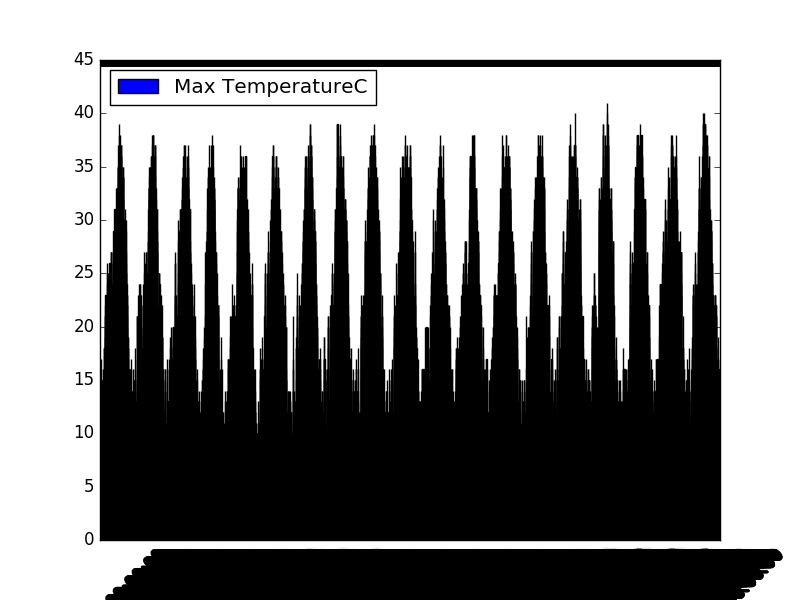

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()
pdDF = res1.toPandas()
pdDF.plot(x='CET', y='Max TemperatureC', kind='bar', rot=45)
display()

In [6]:
#pdDF.plot.scatter(x="x", y="y")  # ???
#display()

--------------------------------------------------------------------------- 
 KeyError Traceback (most recent call last)
 <command-572805894624217> in <module> () 
 ----> 1 pdDF . plot . scatter ( x = "x" , y = "y" ) # ??? 
 2 display ( ) 

 /databricks/python/local/lib/python2.7/site-packages/pandas/tools/plotting.pyc in scatter (self, x, y, s, c, **kwds) 
 3950 axes : matplotlib . AxesSubplot or np . array of them 
 3951 """
 -> 3952 return self ( kind = 'scatter' , x = x , y = y , c = c , s = s , ** kwds ) 
 3953 
 3954 def hexbin(self, x, y, C=None, reduce_C_function=None, gridsize=None,

 /databricks/python/local/lib/python2.7/site-packages/pandas/tools/plotting.pyc in __call__ (self, x, y, kind, ax, subplots, sharex, sharey, layout, figsize, use_index, title, grid, legend, style, logx, logy, loglog, xticks, yticks, xlim, ylim, rot, fontsize, colormap, table, yerr, xerr, secondary_y, sort_columns, **kwds) 
 3772 fontsize = fontsize , colormap = colormap , table = table , 
 3773 yerr = yerr , xerr = xerr , secondary_y = secondary_y , 
 -> 3774 sort_columns=sort_columns, **kwds)
 3775 __call__ . __doc__ = plot_frame . __doc__ 
 3776 

 /databricks/python/local/lib/python2.7/site-packages/pandas/tools/plotting.pyc in plot_frame (data, x, y, kind, ax, subplots, sharex, sharey, layout, figsize, use_index, title, grid, legend, style, logx, logy, loglog, xticks, yticks, xlim, ylim, rot, fontsize, colormap, table, yerr, xerr, secondary_y, sort_columns, **kwds) 
 2641 yerr = yerr , xerr = xerr , 
 2642 secondary_y = secondary_y , sort_columns = sort_columns , 
 -> 2643 **kwds)
 2644 
 2645 

 /databricks/python/local/lib/python2.7/site-packages/pandas/tools/plotting.pyc in _plot (data, x, y, subplots, ax, kind, **kwds) 
 2468 plot_obj = klass ( data , subplots = subplots , ax = ax , kind = kind , ** kwds ) 
 2469 
 -> 2470 plot_obj . generate ( ) 
 2471 plot_obj . draw ( ) 
 2472 return plot_obj . result 

 /databricks/python/local/lib/python2.7/site-packages/pandas/tools/plotting.pyc in generate (self) 
 1041 self . _compute_plot_data ( ) 
 1042 self . _setup_subplots ( ) 
 -> 1043 self . _make_plot ( ) 
 1044 self . _add_table ( ) 
 1045 self . _make_legend ( ) 

 /databricks/python/local/lib/python2.7/site-packages/pandas/tools/plotting.pyc in _make_plot (self) 
 1617 else : 
 1618 label = None 
 -> 1619 scatter = ax.scatter(data[x].values, data[y].values, c=c_values,
 1620 label=label, cmap=cmap, **self.kwds)
 1621 if cb : 

 /databricks/python/local/lib/python2.7/site-packages/pandas/core/frame.pyc in __getitem__ (self, key) 
 2057 return self . _getitem_multilevel ( key ) 
 2058 else : 
 -> 2059 return self . _getitem_column ( key ) 
 2060 
 2061 def _getitem_column ( self , key ) : 

 /databricks/python/local/lib/python2.7/site-packages/pandas/core/frame.pyc in _getitem_column (self, key) 
 2064 # get column 
 2065 if self . columns . is_unique : 
 -> 2066 return self . _get_item_cache ( key ) 
 2067 
 2068 # duplicate columns & possible reduce dimensionality 

 /databricks/python/local/lib/python2.7/site-packages/pandas/core/generic.pyc in _get_item_cache (self, item) 
 1384 res = cache . get ( item ) 
 1385 if res is None : 
 -> 1386 values = self . _data . get ( item ) 
 1387 res = self . _box_item_values ( item , values ) 
 1388 cache [ item ] = res 

 /databricks/python/local/lib/python2.7/site-packages/pandas/core/internals.pyc in get (self, item, fastpath) 
 3541 
 3542 if not isnull ( item ) : 
 -> 3543 loc = self . items . get_loc ( item ) 
 3544 else : 
 3545 indexer = np . arange ( len ( self . items ) ) [ isnull ( self . items ) ] 

 /databricks/python/local/lib/python2.7/site-packages/pandas/indexes/base.pyc in get_loc (self, key, method, tolerance) 
 2134 return self . _engine . get_loc ( key ) 
 2135 except KeyError : 
 -> 2136 return self . _engine . get_loc ( self . _maybe_cast_indexer ( key ) ) 
 2137 
 2138 indexer = self . get_indexer ( [ key ] , method = method , tolerance = tolerance ) 

 /databricks/p

In [7]:
stations = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/stations.csv")
stations.printSchema()

root
-- id: integer (nullable = true)
-- name: string (nullable = true)
-- address: string (nullable = true)
-- lon: double (nullable = true)
-- lat: double (nullable = true)
-- elevation: integer (nullable = true)

In [8]:
stations.registerTempTable("stationsT")
res1 = sqlContext.sql("SELECT name, elevation FROM stationsT")
res1.show()

+--------------------+---------+
 name|elevation|
+--------------------+---------+
 Pza. de España| 635|
 Escuelas Aguirre| 670|
 Avda. Ramón y Cajal| 708|
 Arturo Soria| 693|
 Villaverde| 604|
 Farolillo| 630|
 Casa de Campo| 642|
 Barajas Pueblo| 621|
 Pza. del Carmen| 659|
 Moratalaz| 685|
 Cuatro Caminos| 698|
 Barrio del Pilar| 674|
 Vallecas| 677|
 Mendez Alvaro| 599|
 Castellana| 676|
 Parque del Retiro| 662|
 Plaza Castilla| 728|
Ensanche de Vallecas| 627|
 Urb. Embajada| 618|
Pza. Fernández La...| 604|
+--------------------+---------+
only showing top 20 rows

In [9]:
air_2001 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2001.csv")
air_2002 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2002.csv")
air_2003 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2003.csv")
air_2004 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2004.csv")
air_2005 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2005.csv")
air_2006 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2006.csv")
air_2007 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2007.csv")
air_2008 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2008.csv")
air_2009 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2009.csv")
air_2010 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2010.csv")
air_2011 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2011.csv")
air_2012 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2012.csv")
air_2013 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2013.csv")
air_2014 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2014.csv")
air_2015 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2015.csv")
air_2016 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2016.csv")
air_2017 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2017.csv")
air_2018 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2018.csv")


In [10]:
air_df1 = air_2001.unionByName(air_2002).unionAll(air_2003)
air_df2 = air_2004.unionByName(air_2005).unionAll(air_2006).unionAll(air_2007).unionAll(air_2008).unionAll(air_2009).unionAll(air_2010)
air_df3 = air_2011.unionByName(air_2012).unionAll(air_2013).unionAll(air_2014).unionAll(air_2015).unionAll(air_2016)
air_df4 = air_2017.unionByName(air_2018)
air_df1.printSchema()
air_df2.printSchema()
air_df3.printSchema()
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CH4: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [11]:
common_columns = list(set(air_df1.columns).intersection(air_df2.columns).intersection(air_df3.columns).intersection(air_df4.columns))
print(common_columns)

['EBE', 'CO', 'O_3', 'NO_2', 'SO_2', 'TOL', 'NMHC', 'station', 'PM10', 'TCH', 'date', 'BEN']

In [12]:
for column in list(set(air_df1.columns) - set(common_columns)):
  air_df1 = air_df1.drop(column)
air_df1.printSchema()
for column in list(set(air_df2.columns) - set(common_columns)):
  air_df2 = air_df2.drop(column)
air_df2.printSchema()
for column in list(set(air_df3.columns) - set(common_columns)):
  air_df3 = air_df3.drop(column)
air_df3.printSchema()
for column in list(set(air_df4.columns) - set(common_columns)):
  air_df4 = air_df4.drop(column)
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [13]:
air_df = air_df1.unionByName(air_df2).unionByName(air_df3).unionByName(air_df4)
air_df.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [14]:
#air_df = air_df.dropDuplicates()
air_df.registerTempTable("airT")
res1 = sqlContext.sql("SELECT count(*) FROM airT")
res1.show()

+--------+
count(1)|
+--------+
 3808224|
+--------+

In [15]:
dbutils.fs.rm("/FileStore/tables/Madrid/madrid_2001-2018", True)
air_df.repartition(1).write.format('com.databricks.spark.csv').save("/FileStore/tables/Madrid/madrid_2001-2018", sep=",",header = 'true')

In [16]:
air_df.write.parquet("/tmp/madrid_2001-2018.parquet")